In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# read the dataset 

df = pd.read_csv("winequality-red.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
df.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

<Axes: xlabel='quality', ylabel='count'>

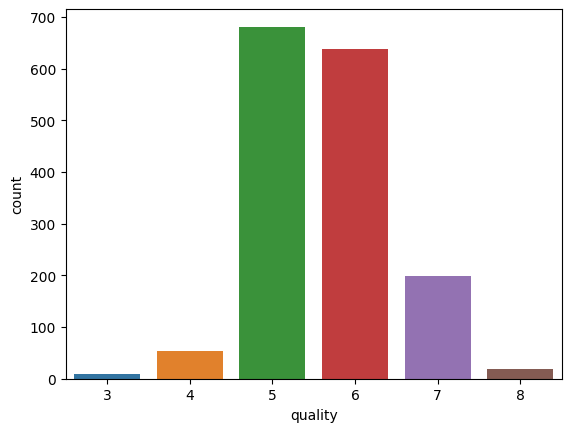

In [ ]:
sns.countplot(data = df, x = "quality")

In [ ]:
df.corr().style.background_gradient()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [ ]:
#split x and y 
x = df.iloc[:,:-1].values
y = df.iloc[:,1].values

In [ ]:
# scale the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

In [ ]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size = 0.3, random_state = 1)

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_squared_error


#step 1 = model creation
ann = Sequential()

#step 2 = adding layers
ann.add(Dense(units = 5, activation = "relu"))
ann.add(Dense(units = 5, activation = "relu"))
ann.add(Dense(units = 5, activation = "relu"))

#step 3 = output layer
ann.add(Dense(units = 1))

#Step 4 = compile 
ann.compile(optimizer = "rmsprop", loss = "mse")

#step 5 = training
ann.fit(xtrain, ytrain, epochs = 600)

Epoch 1/600
35/35 [==============================] - 1s 2ms/step - loss: 0.5524
Epoch 2/600
35/35 [==============================] - 0s 2ms/step - loss: 0.3551
Epoch 3/600
35/35 [==============================] - 0s 2ms/step - loss: 0.2632
Epoch 4/600
35/35 [==============================] - 0s 2ms/step - loss: 0.2095
Epoch 5/600
35/35 [==============================] - 0s 2ms/step - loss: 0.1742
Epoch 6/600
35/35 [==============================] - 0s 2ms/step - loss: 0.1477
Epoch 7/600
35/35 [==============================] - 0s 2ms/step - loss: 0.1249
Epoch 8/600
35/35 [==============================] - 0s 2ms/step - loss: 0.1052
Epoch 9/600
35/35 [==============================] - 0s 2ms/step - loss: 0.0880
Epoch 10/600
35/35 [==============================] - 0s 2ms/step - loss: 0.0734
Epoch 11/600
35/35 [==============================] - 0s 2ms/step - loss: 0.0611
Epoch 12/600
35/35 [==============================] - 0s 2ms/step - loss: 0.0512
Epoch 13/600
35/35 [=================

In [ ]:
loss = pd.DataFrame(ann.history.history)
loss.head()

,loss
0,0.552404
1,0.355102
2,0.263200
3,0.209462
4,0.174217


In [ ]:
loss.tail()

,loss
595,0.000018
596,0.000022
597,0.000021
598,0.000019
599,0.000019


<Axes: >

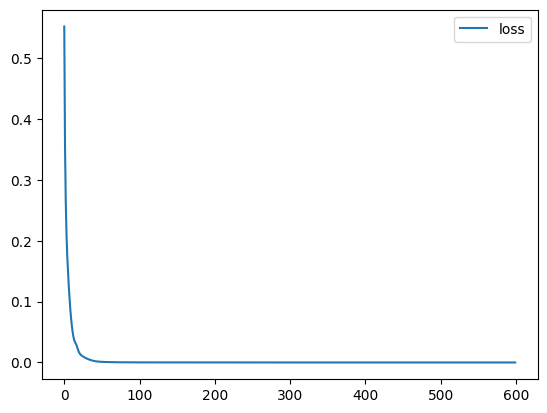

In [ ]:
loss.plot()

In [ ]:
#checking the training & testing score of our model
ann.evaluate(xtrain,ytrain)
ann.evaluate(xtest,ytest)

15/15 [==============================] - 0s 2ms/step - loss: 2.2711e-05


2.2710850316798314e-05

In [ ]:
ypred = ann.predict(xtest)

15/15 [==============================] - 0s 2ms/step


In [ ]:
dic={"Actual Y":ytest,"Predicted y":ypred.flatten()}
df1=pd.DataFrame(dic)

<Axes: xlabel='Actual Y', ylabel='Predicted y'>

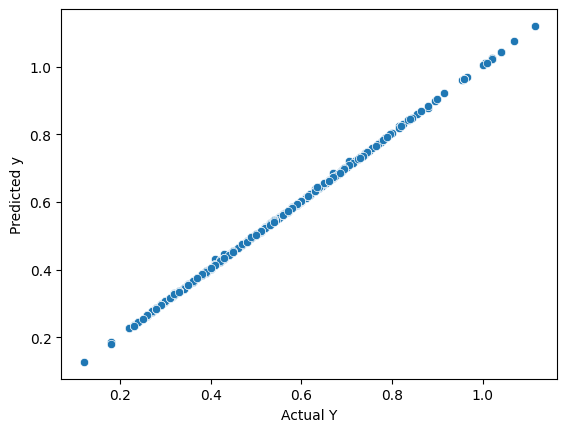

In [ ]:
sns.scatterplot(x="Actual Y",y="Predicted y",data=df1)

In [ ]:
#as graph is linear, so our model is good
from sklearn.metrics import mean_squared_error
print(f"MSE={mean_squared_error(ytest,ypred)}")
print(f"RMSE={np.sqrt(mean_squared_error(ytest,ypred))}")

MSE=2.2710847713586543e-05
RMSE=0.004765589964903248


In [ ]:
#unknown data prediction 
newdata = [[13,7,5,8.0,1.9,9.0,9,8,7,6,6]]
newdata = sc.transform(newdata)

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
ann.save("winequality-red")

In [ ]:
#to call model
fr=load_model("winequality-red")
fr.predict(newdata)

1/1 [==============================] - 0s 100ms/step


array([[-28.880188]], dtype=float32)